In [ ]:
#Importing all libraries 

from pandas_datareader import data
import matplotlib.pyplot as plt #visualization of data
import pandas as pd #used to read the datset 
import datetime as dt
import datetime
import urllib.request, json
import os
import numpy as np #perform basic array operations
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler #used to scale the data

from sklearn.metrics import mean_absolute_error,mean_squared_error

# API KEY: RWL0I1BNSUZDQFC7

In [ ]:
data_source = 'alphavantage'

if data_source == 'alphavantage':
    # Loading data from Alphavantage 

    api_key = 'RWL0I1BNSUZDQFC7'

    ticker = "GOOG"

    # JSON file with all the stock market data
    url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

    # Saving the data to this file
    file_to_save = 'stock_market_data-%s.csv'%ticker

    # If you haven't already saved data,
    # Go ahead and grab the data from the url
    # And store date, low, high, volume, close, open values to a Pandas DataFrame
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            # extract stock market data
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
            for k,v in data.items():
                date = dt.datetime.strptime(k, '%Y-%m-%d')
                data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                            float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:] = data_row
                df.index = df.index + 1
        print('Data saved to : %s'%file_to_save)        
        df.to_csv(file_to_save)

    # If the data is already there, just load it from the CSV
    else:
        print('File already exists. Loading data from CSV')
        df = pd.read_csv(file_to_save,index_col=0)

else:

    # Loading localy saved data
    df = pd.read_csv("GOOG.csv")
    print('Loaded data from localy saved data')

Data saved to : stock_market_data-GOOG.csv


# Data Preprocessing 

In [ ]:
df=df.set_index('Date')
df

,Low,High,Close,Open
Date,,,,
2020-10-09,1489.45,1516.52,1515.22,1494.7
2020-10-08,1465.09,1490,1485.93,1465.09
2020-10-07,1436,1468.96,1460.29,1464.29
2020-10-06,1448.59,1486.76,1453.44,1475.58
2020-10-05,1464.27,1488.21,1486.02,1466.21
...,...,...,...,...
2014-04-02,562.19,604.83,567,565.106
2014-04-01,558.71,568.45,567.16,558.71
2014-03-31,556.93,567,556.97,566.89


In [ ]:
X=df.iloc[:,[0,1,3]]
y=df.iloc[:,[2]]

"""df1= df['Close']
df1

scaler =  MinMaxScaler()
df1= scaler.fit_transform(df1.values.reshape(-1,1))
df1"""

"df1= df['Close']\ndf1\n\nscaler =  MinMaxScaler()\ndf1= scaler.fit_transform(df1.values.reshape(-1,1))\ndf1"

In [ ]:
X_test = X[0:196]
y_test = y[0:196]

X_train= X[196:]
y_train= y[196:]



"""df_train=df1[196:]
df_test= df1[0:196]"""

'df_train=df1[196:]\ndf_test= df1[0:196]'

In [ ]:
X_train #df_train

,Low,High,Open
Date,,,
2019-12-31,1329.09,1338,1330.11
2019-12-30,1334.02,1353,1350
2019-12-27,1349.31,1364.53,1362.99
2019-12-26,1344.47,1361.33,1346.17
2019-12-24,1342.78,1350.26,1348.5
...,...,...,...
2014-04-02,562.19,604.83,565.106
2014-04-01,558.71,568.45,558.71
2014-03-31,556.93,567,566.89


In [ ]:
X_test

,Low,High,Open
Date,,,
2020-10-09,1489.45,1516.52,1494.7
2020-10-08,1465.09,1490,1465.09
2020-10-07,1436,1468.96,1464.29
2020-10-06,1448.59,1486.76,1475.58
2020-10-05,1464.27,1488.21,1466.21
...,...,...,...
2020-01-08,1390.84,1411.58,1392.08
2020-01-07,1390.38,1402.99,1397.94
2020-01-06,1350,1396.5,1350


To make the data in the training set lie in the same range of 0 to 1 in order to improve accuracy

We will read the data for first 60 days and then predict for the 61st day. 
Then we will hop ahead by one day and read the next chunk of data for next sixty days.


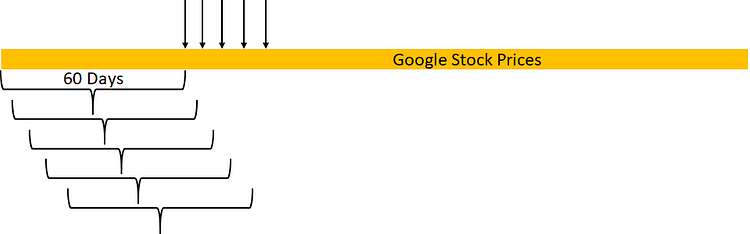

In [ ]:
x_scaler= MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled= x_scaler.fit_transform(X_train) 
y_train_scaled= y_scaler.fit_transform(y_train)

X_test_scaled = x_scaler.transform(X_test)
y_test_scaled= y_scaler.transform(y_test)

In [ ]:
X_test_scaled.shape,y_test_scaled.shape,X_train_scaled.shape,y_train_scaled.shape

((196, 3), (196, 1), (1452, 3), (1452, 1))

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_ds, y_train_ds = create_dataset(X_train_scaled,y_train_scaled,time_steps=60)
X_test_ds, y_test_ds = create_dataset(X_test_scaled,y_test_scaled,time_steps=60)

In [ ]:
X_train_ds.shape,y_train_ds.shape,X_test_ds.shape,y_test_ds.shape,

((1392, 60, 3), (1392, 1), (136, 60, 3), (136, 1))

# Building LSTM

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 150,input_shape = (X_train_ds.shape[1],3)))
regressor.add(Dropout(0.2))

regressor.add(Dense(64,activation='relu'))
regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 150)               92400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                9664      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 102,129
Trainable params: 102,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error',metrics='mae')
regressor.fit(X_train_ds, y_train_ds, epochs=10, batch_size=32)

Epoch 1/10
44/44 [==============================] - 3s 77ms/step - loss: 0.0161 - mae: 0.0721
Epoch 2/10
44/44 [==============================] - 3s 77ms/step - loss: 0.0016 - mae: 0.0282
Epoch 3/10
44/44 [==============================] - 3s 76ms/step - loss: 0.0013 - mae: 0.0257
Epoch 4/10
44/44 [==============================] - 3s 75ms/step - loss: 0.0012 - mae: 0.0246
Epoch 5/10
44/44 [==============================] - 3s 78ms/step - loss: 0.0013 - mae: 0.0255
Epoch 6/10
44/44 [==============================] - 3s 76ms/step - loss: 0.0010 - mae: 0.0229
Epoch 7/10
44/44 [==============================] - 3s 76ms/step - loss: 0.0010 - mae: 0.0228
Epoch 8/10
44/44 [==============================] - 3s 77ms/step - loss: 9.3713e-04 - mae: 0.0218
Epoch 9/10
44/44 [==============================] - 4s 84ms/step - loss: 8.3102e-04 - mae: 0.0207
Epoch 10/10
44/44 [==============================] - 4s 84ms/step - loss: 9.3307e-04 - mae: 0.0214


In [ ]:
y_pred = regressor.predict(X_test_ds)

In [ ]:
print(y_pred.shape)

y_pred= y_pred.reshape(136,1)

(136, 1)


In [ ]:
y_pred_inverse_scaled= y_scaler.inverse_transform(y_pred)
y_test_inverse_scaled= y_scaler.inverse_transform(y_test_ds)

In [ ]:
y_test_inverse_scaled.shape,y_pred_inverse_scaled.shape

((136, 1), (136, 1))

In [ ]:
mean_absolute_error(y_test_inverse_scaled,y_pred_inverse_scaled),np.sqrt(mean_squared_error(y_test_inverse_scaled,y_pred_inverse_scaled))

(28.39865877039293, 40.452811768830244)

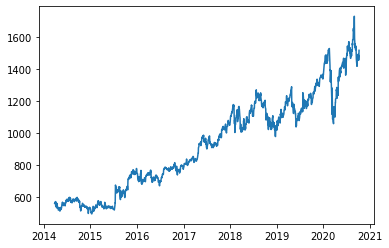

In [ ]:
plt.plot(df['Close'])

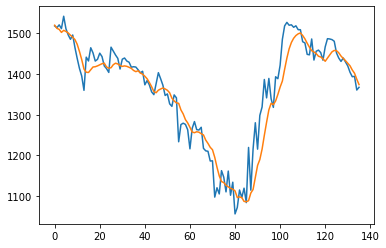

In [ ]:
plt.plot(y_test_inverse_scaled)
plt.plot(y_pred_inverse_scaled)
plt.show()

# Visualization

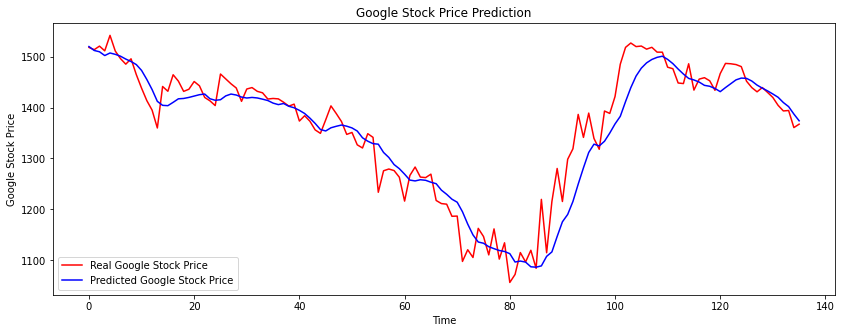

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test_inverse_scaled, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred_inverse_scaled, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.savefig("Plot.png")